<b><h1>Perceptron:</h1></b><br> Inputs combined with weights and then sent to step function - Bias term added in as well.

h(X) =φ(XW+b) = Computing output
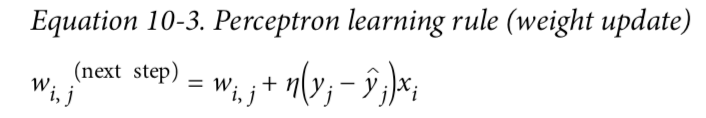

In [3]:
import numpy as np
from sklearn.datasets import load_iris 
from sklearn.linear_model import Perceptron

In [4]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width y = (iris.target == 0).astype(np.int) # Iris setosa?

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
y = (iris.target == 0).astype(np.int) # Iris setosa?

In [10]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
y_pred = per_clf.predict([[2, 0.5]])

<h1>Implementing MLP Using Keras

<b>Activation Functions: </b>

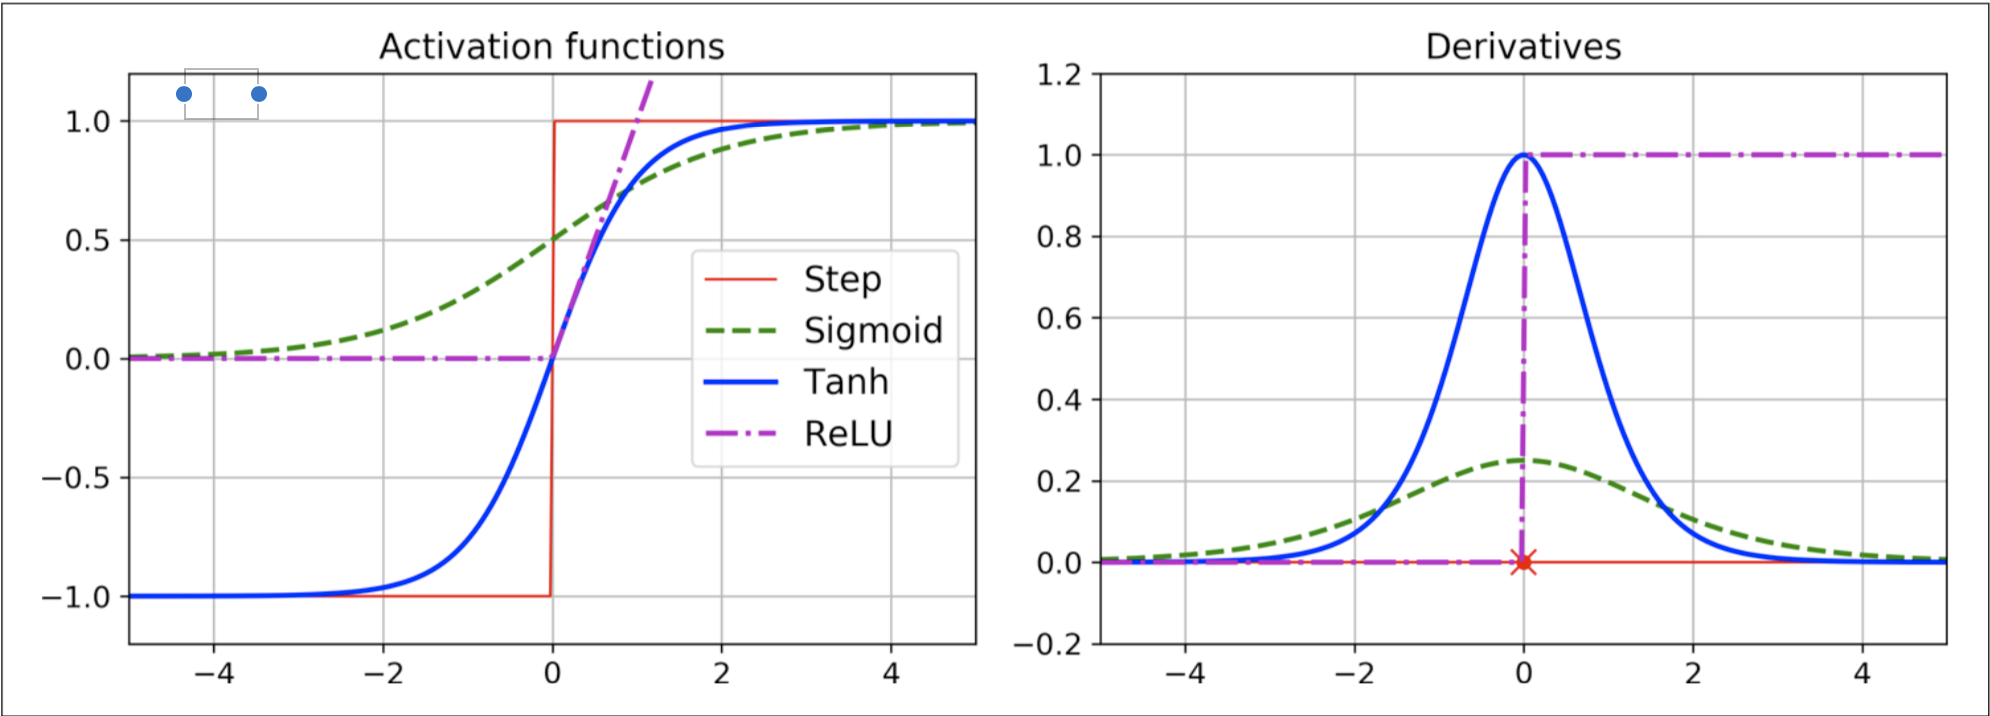

Loss Function : Huber loss. The Huber loss is quadratic when the error is smaller than a thres‐ hold δ (typically 1) but linear when the error is larger than δ. The linear part makes it less sensitive to outliers than the mean squared error, and the quadratic part allows it to converge faster and be more precise than the mean absolute error.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.1.0'

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_train_full[0] # Pixel intensity is given 0-255 - Int.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplic‐ ity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 and also splitting a validation set.

In [13]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [14]:
y_valid[0]

9

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Coat'

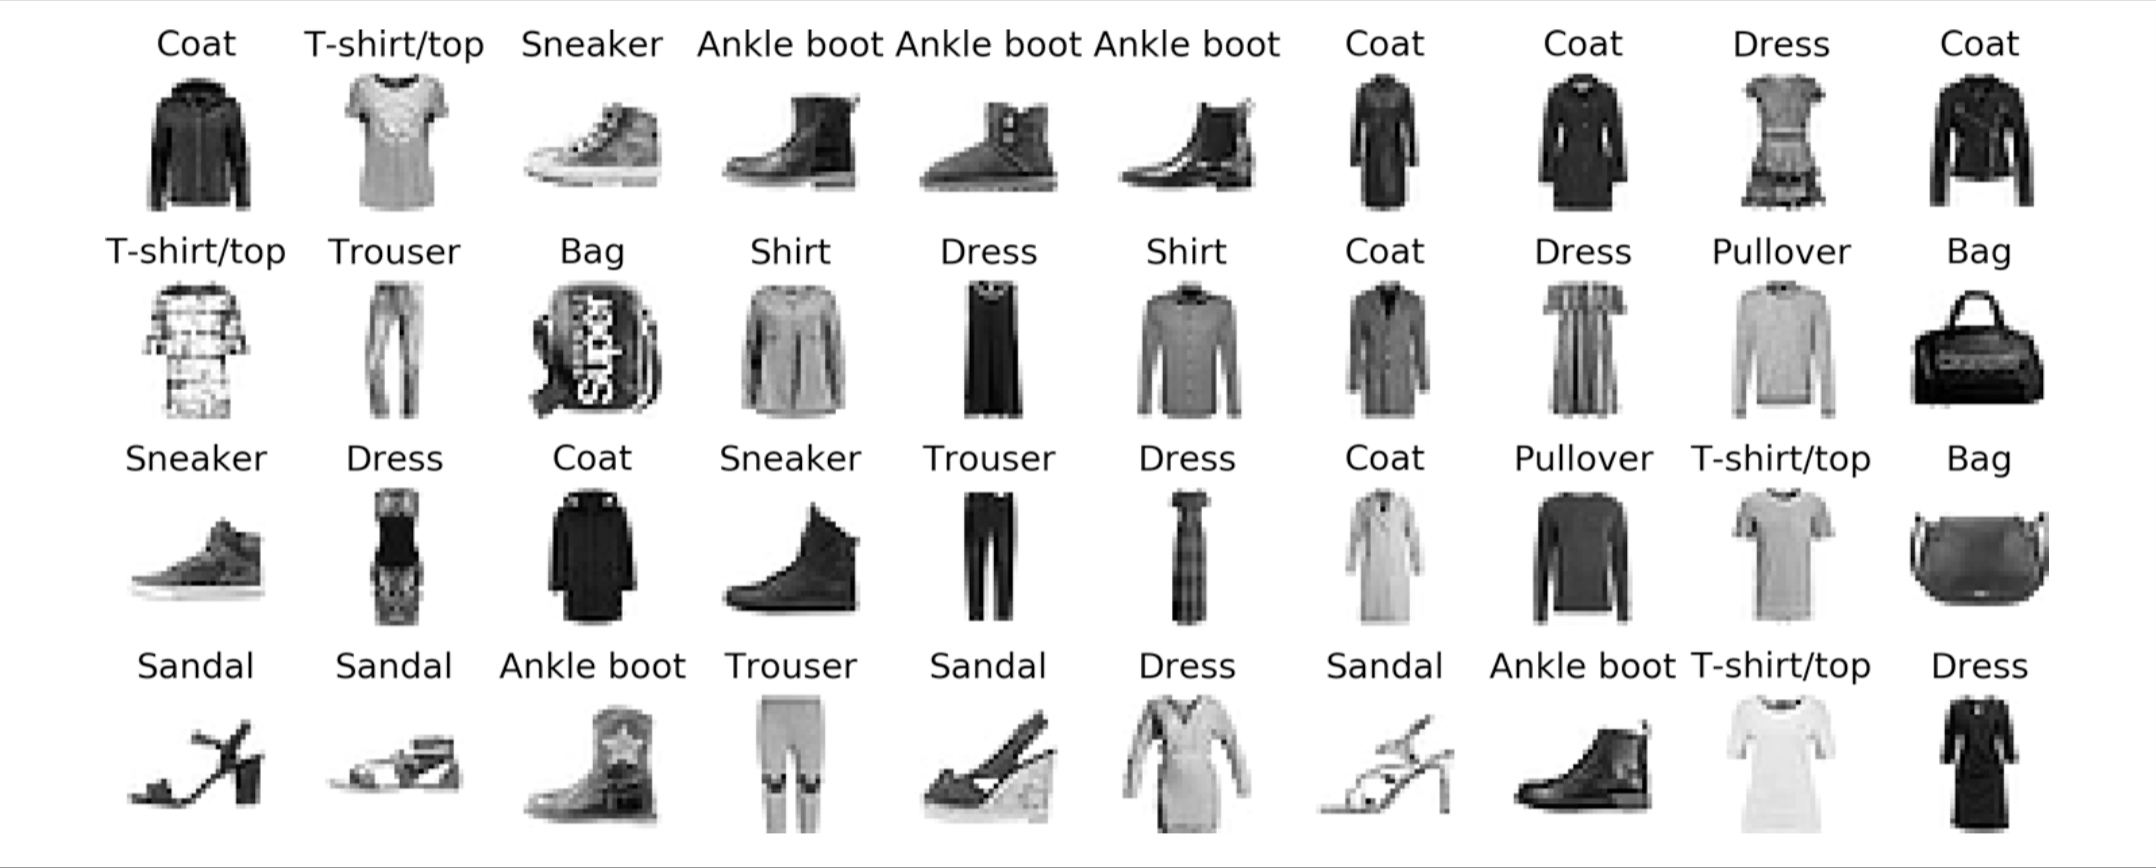

<h3>Creating the model using the Sequential API

In [17]:
model = keras.models.Sequential() # Single stack of layers connected sequentially
model.add(keras.layers.Flatten(input_shape=[28,28])) # Convert the input image to a 1D array. X.reshape(-1,1)
model.add(keras.layers.Dense(300,activation="relu")) #own weight matrix, containing all the connection weights between the neurons and their inputs. 
                                                    #It also manages a vec‐ tor of bias terms (one per neuron)
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax")) # used softmax since it is a multiclass classification;classes are exclusive

https://keras.io/api/layers/activations/

In [18]:
model.summary() # Here None, represents that the batch size could be anything.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


https://keras.io/initializers/

In [19]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"]) # metrics are extra

https://keras.io/losses , https://keras.io/optimizers , https://keras.io/metrics

Training and evaluating the model

In [20]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 47us/sample - loss: 0.7118 - accuracy: 0.7662 - val_loss: 0.5049 - val_accuracy: 0.8268
Epoch 2/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.4877 - accuracy: 0.8287 - val_loss: 0.4366 - val_accuracy: 0.8518
Epoch 3/30
55000/55000 [==============================] - 2s 41us/sample - loss: 0.4434 - accuracy: 0.8448 - val_loss: 0.4141 - val_accuracy: 0.8582
Epoch 4/30
55000/55000 [==============================] - 2s 41us/sample - loss: 0.4162 - accuracy: 0.8549 - val_loss: 0.3878 - val_accuracy: 0.8668
Epoch 5/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.3963 - accuracy: 0.8612 - val_loss: 0.3846 - val_accuracy: 0.8636
Epoch 6/30
55000/55000 [==============================] - 2s 42us/sample - loss: 0.3794 - accuracy: 0.8667 - val_loss: 0.3623 - val_accuracy: 0.8730
Epoch 7/30
55000/55000 [==============================] -

In [55]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [54]:
history.history

{'loss': [0.7073594164371491,
  0.4861839890610088,
  0.4421757910078222,
  0.4153257051121105,
  0.39526700330214065,
  0.37939267459349196,
  0.36673171549276873,
  0.3548243270223791,
  0.3447648881522092,
  0.3350652291016145,
  0.32634443532553586,
  0.3188478307420557,
  0.3119645685000853,
  0.30454581133669073,
  0.29808959987813777,
  0.29264196643395857,
  0.2855925336935303,
  0.2801067056655884,
  0.2751513675472953,
  0.26954426947886295,
  0.26478800011764875,
  0.25999576741782104,
  0.25523441961786963,
  0.25119796467477623,
  0.24631966160644184,
  0.24165917691534217,
  0.2382370160612193,
  0.23331040442206644,
  0.23042481798637998,
  0.22637512916976754],
 'accuracy': [0.76614547,
  0.83043635,
  0.84574544,
  0.8524182,
  0.86265457,
  0.8661091,
  0.87125456,
  0.8740182,
  0.8769636,
  0.8822727,
  0.8841636,
  0.88543636,
  0.88845456,
  0.89101815,
  0.89281815,
  0.89583635,
  0.8970364,
  0.8984909,
  0.90098184,
  0.90296364,
  0.9045454,
  0.906,
  0.9080

Learning curves

(0, 1)

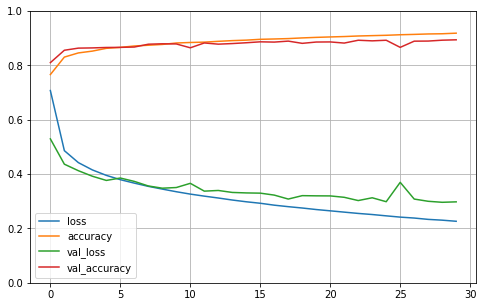

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In this particular case, the model looks like it performed better on the validation set than on the training set at the <u>beginning of training</u>. But that’s not the case: indeed, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

In [57]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 61.0509 - accuracy: 0.8541


[61.05093663728647, 0.8541]

In [65]:
#Seems like the test set is completely different.

In [59]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [63]:
X_test_scaled = X_test / 255.0

In [64]:
model.evaluate(X_test_scaled, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3274 - accuracy: 0.8844


[0.32741488860845563, 0.8844]

You see the difference here. Previous loss function was huge. The reason was that the model was trained on scaled values 0-1. While the testing is being done on the Ints 0-255. 

In [66]:
X_new = X_test_scaled[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [67]:
y_pred = model.predict_classes(X_new)

In [68]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [21]:
model.save('saved_classification_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_classification_model/assets


In [22]:
model.save('saved_classification_model_h5form.h5')